In [66]:

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix

%matplotlib inline
plt.style.use('seaborn-white')

### *Stock market data*

This data set consists of
percentage returns for the S&P 500 stock index over 1, 250 days, from the
beginning of 2001 until the end of 2005. For each date, we have recorded
the percentage returns for each of the five previous trading days, Lag1
through Lag5. We have also recorded Volume (the number of shares traded on the previous day, in billions), Today (the percentage return on the date
in question) and Direction (whether the market was Up or Down on this
date).

In [56]:
smarket_df = pd.read_csv('datasets/Smarket.csv', index_col=0, parse_dates=True)
cols = smarket_df.columns.drop('Direction')
smarket_df[cols] = smarket_df[cols].apply(pd.to_numeric, errors='coerce')
smarket_df['Direction'] = smarket_df['Direction'].apply(lambda x: 1 if x == 'Up' else 0)

In [51]:
smarket_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [52]:
smarket_df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


In [53]:
smarket_df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


As one would expect, the correlations between the lag variables and today’s
returns are close to zero. In other words, there appears to be little
correlation between today’s returns and previous days’ returns. The only
substantial correlation is between Year and Volume. By plotting the data we
see that Volume is increasing over time. In other words, the average number
of shares traded daily increased from 2001 to 2005.

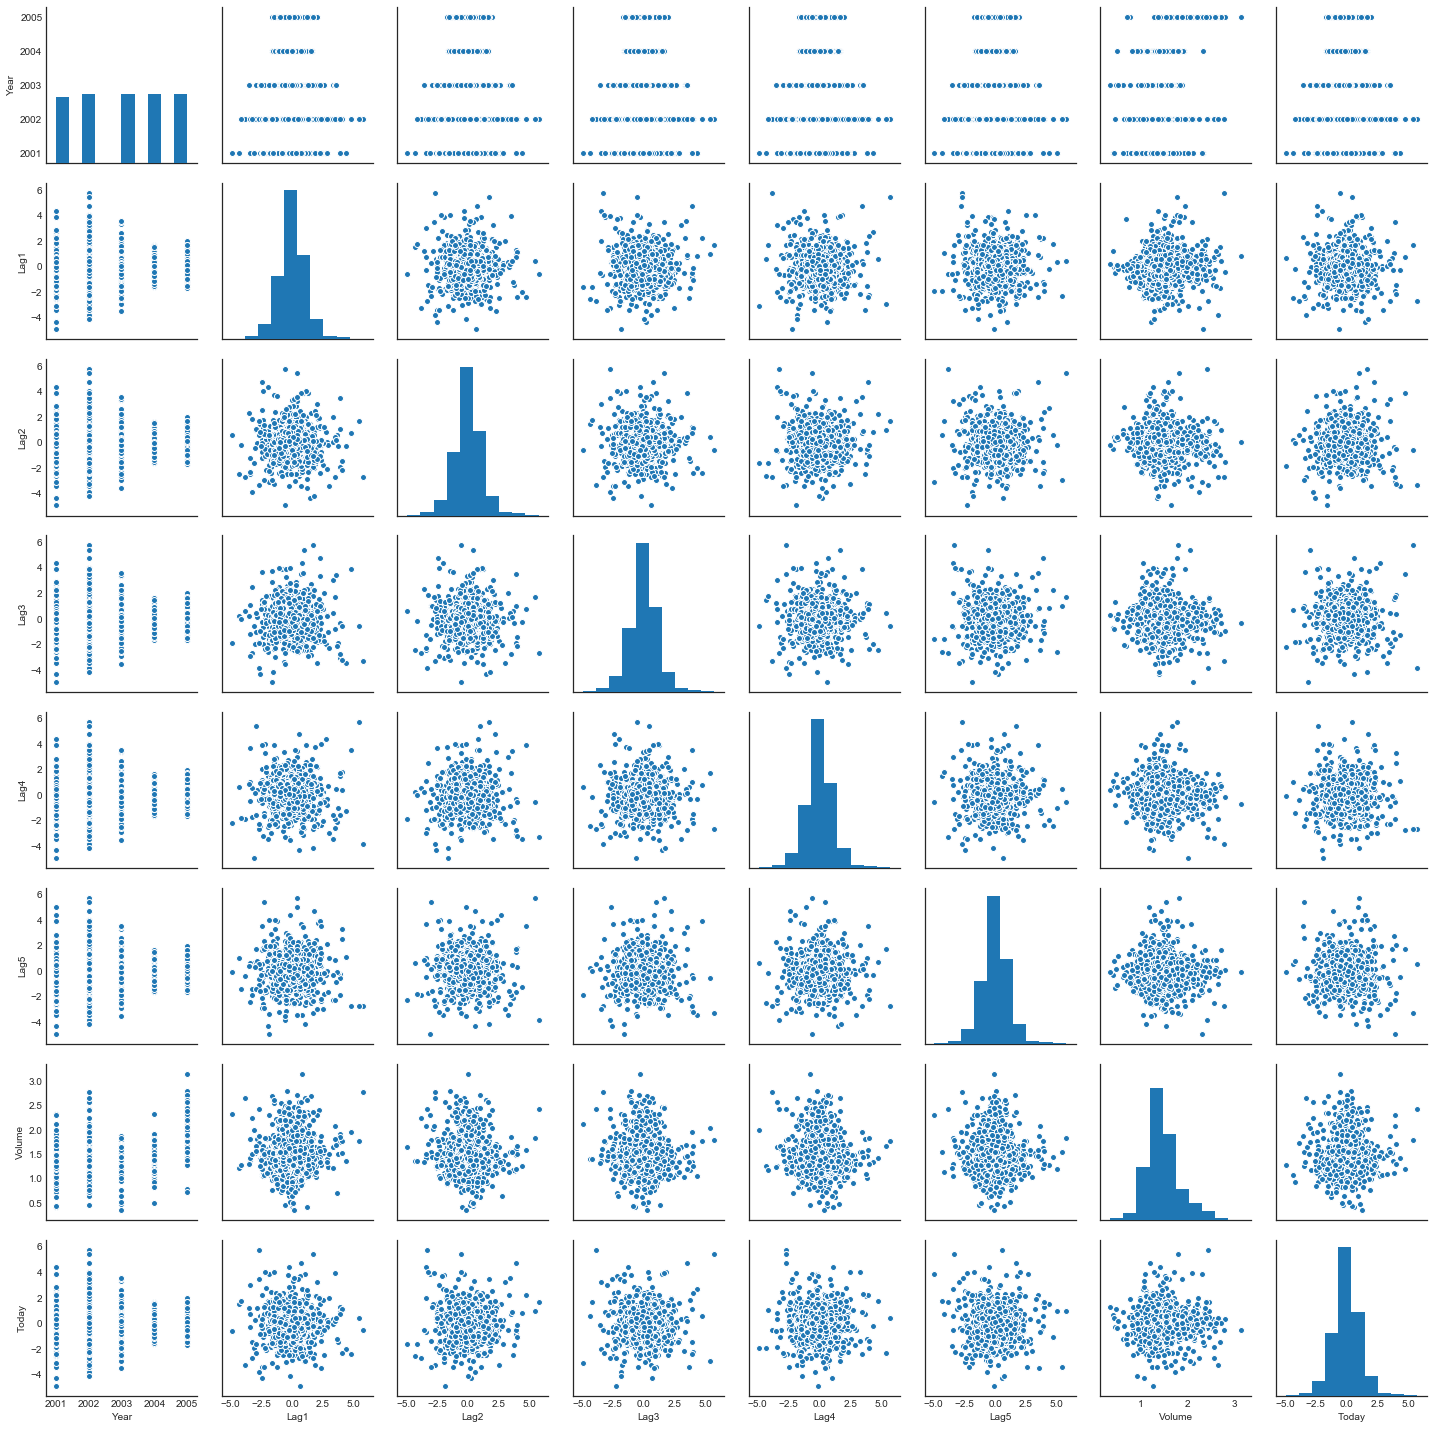

In [54]:
sns.pairplot(smarket_df)

### *Logistic regresion*

In [60]:
est = smf.Logit(smarket_df['Direction'], smarket_df.drop(columns=['Direction','Year','Today'])[]).fit()
est.summary2().tables[1]

Optimization terminated successfully.
         Current function value: 0.691143
         Iterations 4


,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
Lag1,-0.072063,0.050120,-1.437804,0.150490,-0.170297,0.026171
Lag2,-0.043420,0.050034,-0.867803,0.385502,-0.141485,0.054645
Lag3,0.009969,0.049889,0.199834,0.841611,-0.087811,0.107750
Lag4,0.008073,0.049908,0.161749,0.871503,-0.089746,0.105891
Lag5,0.009685,0.049496,0.195682,0.844859,-0.087325,0.106696
Volume,0.054905,0.037274,1.473034,0.140742,-0.018150,0.127960


In [62]:
predictions = est.predict()

In [63]:
discrete_predictions = np.vectorize(lambda x: 1 if x > 0.5 else 0)(predictions)

In [67]:
confusion_matrix(smarket_df['Direction'], discrete_predictions)

array([[100, 502],
       [ 93, 555]])